<a href="https://colab.research.google.com/github/ReutEdvi/pandas/blob/main/PandasDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                            Welcome to the **BIG DATA LABORATORY**



In [7]:
import pandas as pd
import numpy as np

In [8]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/titanic.csv')

In [9]:
titanic_df.sample(5)

PassengerId  Survived  Pclass                    Name     Sex   Age  \
585          586       1.0       1     Taussig, Miss. Ruth  female  18.0   
864          865       0.0       2  Gill, Mr. John William    male  24.0   
764          765       0.0       3  Eklund, Mr. Hans Linus    male  16.0   
350          351       0.0       3  Odahl, Mr. Nils Martin    male  23.0   
504          505       1.0       1   Maioni, Miss. Roberta  female  16.0   

     SibSp  Parch  Ticket    Fare  ... Embarked  WikiId  \
585      0      2  110413  79.650  ...        S   293.0   
864      0      0  233866  13.000  ...        S   426.0   
764      0      0  347074   7.775  ...        S   795.0   
350      0      0    7267   9.225  ...        S  1090.0   
504      0      0  110152  86.500  ...        S   184.0   

                                             Name_wiki Age_wiki  \
585                                 Taussig, Miss Ruth     18.0   
864                             Gill, Mr. John William     24.0   
764                             Eklund, Mr. Hans Linus     16.0   
350                             Ödahl, Mr. Nils Martin     23.0   
504  and maid, Miss Roberta Elizabeth Mary "Cissy" ...     20.0   

                                Hometown      Boarded  \
585               New York, New York, US  Southampton   
864     Clevedon, North Somerset England  Southampton   
764              Kårberg, Örebro, Sweden  Southampton   
350                Örsjö, Kalmar, Sweden  Southampton   
504  Vancouver, British Columbia, Canada  Southampton   

                             Destination Lifeboat   Body Class  
585               New York, New York, US        8    NaN   1.0  
864                        New York City      NaN  155MB   2.0  
764         Jerome Junction, Arizona, US      NaN    NaN   3.0  
350                 Peoria, Illinois, US      NaN    NaN   3.0  
504  Vancouver, British Columbia, Canada        8    NaN   1.0  

[5 rows x 21 columns]

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

## Know your data
working with features without understanding their meanings doesn't make sense and can be very wasteful in time and energy.

## Understand your data before you move on to the next step!

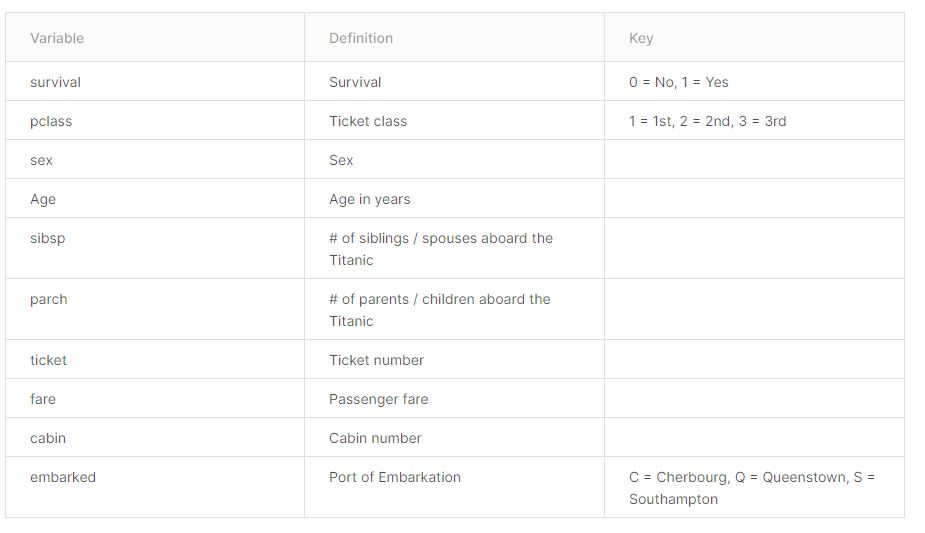

##Frequency analysis with crosstab
The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.

By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.



### Single dimention frequency analysis

In [11]:
#how many passengers were in each ticket class
class_freq_df = pd.crosstab(index=titanic_df.Pclass, columns=['Count'], colnames=['Item'])
class_freq_df

Item    Count
Pclass       
1         323
2         277
3         709

In [12]:
#sort df by index in descending order 
class_freq_df.sort_index(ascending=False, inplace=True)
class_freq_df

Item    Count
Pclass       
3         709
2         277
1         323

In [13]:
#sort df by column value in acending order
class_freq_df.sort_values(by='Count', ascending=True, inplace=True)
class_freq_df

Item    Count
Pclass       
2         277
1         323
3         709

In [14]:
#add a precentage column
class_perc_df = round(pd.crosstab(index=titanic_df.Pclass, columns='Percentage', colnames=['items'], normalize=True)*100, ndigits=2)
class_perc_df

items   Percentage
Pclass            
1            24.68
2            21.16
3            54.16

In [15]:
class_freq_df.insert(loc=len(class_freq_df.columns), column='Percentage', value=class_perc_df)
class_freq_df

Item    Count  Percentage
Pclass                   
2         277       24.68
1         323       21.16
3         709       54.16

###Multi-dimentional frequency analysis



In [16]:
#how many passengers were in each ticket class by gender?
class_freq_df = pd.crosstab(titanic_df.Pclass, titanic_df.Sex, margins=True)
class_freq_df

Sex     female  male   All
Pclass                    
1          144   179   323
2          106   171   277
3          216   493   709
All        466   843  1309

In [17]:
#how many survived passengers in each ticket class?
class_freq_df = pd.crosstab([titanic_df.Pclass, titanic_df.Survived], columns='Count')
class_freq_df

col_0            Count
Pclass Survived       
1      0.0          80
       1.0         136
2      0.0          97
       1.0          87
3      0.0         372
       1.0         119

In [18]:
#how many survived passengers in each ticket class by gender?
class_freq_df = pd.crosstab([titanic_df.Pclass, titanic_df.Survived], titanic_df.Sex, margins=True)
class_freq_df

Sex              female  male  All
Pclass Survived                   
1      0.0            3    77   80
       1.0           91    45  136
2      0.0            6    91   97
       1.0           70    17   87
3      0.0           72   300  372
       1.0           72    47  119
All                 314   577  891